# Exploratory Analysis

## Objetivo

1. Análisis de las variables
1. Si los alumnos de portugués aprobaran la tercera evaluación
1. ¿Con cuánta nota?

Para cumplir con los objetivos tenemos que trabajar con los datos de los alumnos que estudian portugués. Ya que tenemos que obtener la nota con la que aprueban la tercera evaluación, no nos vale con un algoritmo de clasificación binaria. Trabajaremos para intentar predecir la nota y si es mayor que la mitad (20 es la nota más alta posible) consideraremos que el alumno aprueba.

## Cargamos los datos

Primero importamos panda y cargamos el dataset de los datos de los alumnos que estudian portugués. Mostramos el tamaño del dataset y una muestra de los datos.

In [1]:
import pandas as pd

df = pd.read_csv("data/student-por.csv")
print(df.shape)
df.head(1)

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


## Selección de características

Disponemos de los siguientes datos en el dataset:

- **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex** - student's sex (binary: 'F' - female or 'M' - male)
- **age** - student's age (numeric: from 15 to 22)
- **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime** - home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 > 1 hour)
- **studytime** - weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - > 10 hours)
- **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup** - extra educational support (binary: yes or no)
- **famsup** - family educational support (binary: yes or no)
- **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities** - extra-curricular activities (binary: yes or no)
- **nursery** - attended nursery school (binary: yes or no)
- **higher** - wants to take higher education (binary: yes or no)
- **internet** - Internet access at home (binary: yes or no)
- **romantic** - with a romantic relationship (binary: yes or no)
- **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
- **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health** - current health status (numeric: from 1 - very bad to 5 - very good)
- **absences** - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

- **G1** - first period grade (numeric: from 0 to 20)
- **G2** - second period grade (numeric: from 0 to 20)
- **G3** - final grade (numeric: from 0 to 20, output target)

Vamos a analizar cómo afectan cada una de las variables al porcentaje de aprobados. Lo primero es crear una columna de si han aprovado o no la tercera evaluación.

In [2]:
import matplotlib.pyplot as plt

df['is_approved'] = df.G3 >= 10

def compare_feature(columun):
    is_approved_pivot = df.pivot_table(index=columun,values="is_approved")
    print(is_approved_pivot)
    is_approved_pivot.plot.bar()
    plt.show()

Vemos que, a priori, no podemos descartar ninguna variable. Vamos a analizar alguna variable más en detalle para ver cómo se distribuyen el porcentaje de aprobados.

Podemos observar que hay un número significante mayor de aprobados en el colegio GP que en el MS.

        is_approved
school             
GP         0.924350
MS         0.699115


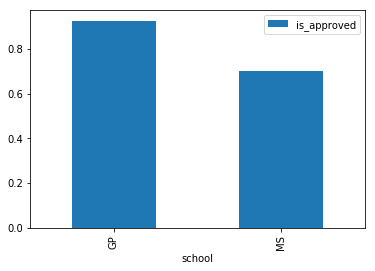

In [3]:
compare_feature("school")

Hay ligeramente más aprobados del sexo femenino que del masculino.

     is_approved
sex             
F       0.869452
M       0.812030


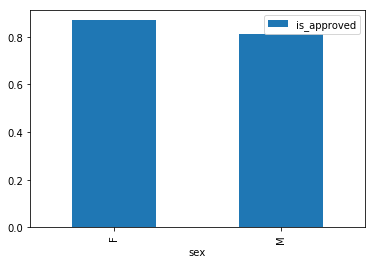

In [4]:
compare_feature("sex")

Podemos ver que hay más aprobado que viven en zonas urbanas que los que viven en zonas rurales.

         is_approved
address             
R           0.776650
U           0.876106


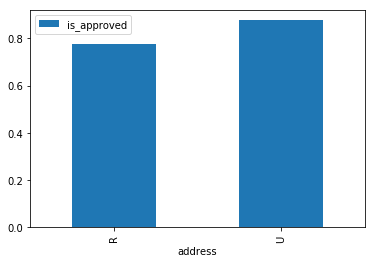

In [5]:
compare_feature("address")

Además, según la razón por la que eligieron el colegio, también hay una diferencia entre los que lo eligieron por reputación y el resto.

            is_approved
reason                 
course         0.807018
home           0.885906
other          0.750000
reputation     0.930070


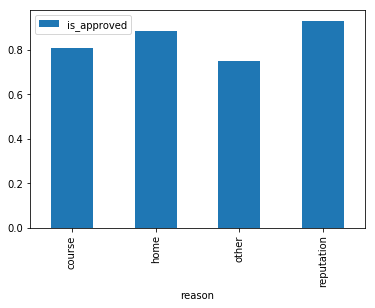

In [6]:
compare_feature("reason")

También podemos observar que hay una mayor cantidad de aprobados en función de cuantas veces han faltado a clases. Cuantas menos clases se han saltado, el porcentaje de aprobados aumenta.

          is_approved
failures             
0            0.907104
1            0.542857
2            0.500000
3            0.357143


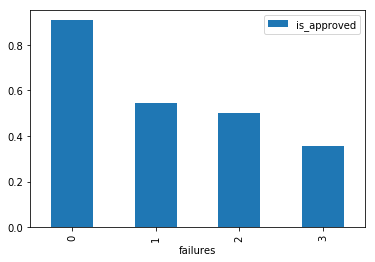

In [7]:
compare_feature("failures")

Parece que hay una relación entre el alcohol diario consumido y el número de aprobados. Los que menos beben, aprueba más.

      is_approved
Dalc             
1        0.871397
2        0.801653
3        0.837209
4        0.705882
5        0.647059


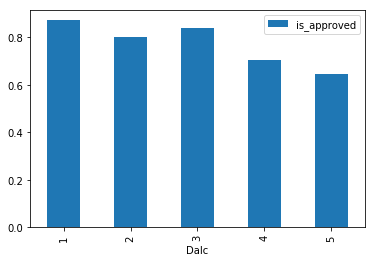

In [8]:
compare_feature("Dalc")

Parece que hay una relación entre el alcohol semanal consumido y el número de aprobados. Los que menos beben, aprueba más.

      is_approved
Walc             
1        0.886640
2        0.860000
3        0.808333
4        0.816092
5        0.733333


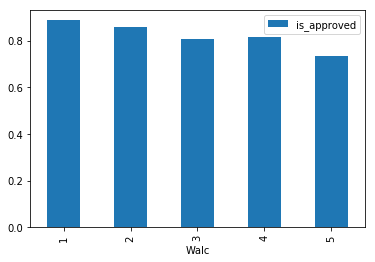

In [9]:
compare_feature("Walc")

## Selección automática de variables

Después de analizar las variables y entender más el problema, vamos a trabajar con herramienta que nos ayuden a elegir qué varibles pueden ser más útiles para nuestro problema.

Lo primero que tenemos que hacer es analzar las variables que tenemos y cómo afectan a la salida.

In [107]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def add_to_array(array, item):
    new_array = array.copy()
    new_array.append(item)
    return new_array

def calculate_mutual_info(features, df, y):
    feature_array = np.array(df[features])
    return mutual_info_classif(feature_array, df[y], discrete_features=True)[0]

def calculate_mutual_info_for_dataset(df, selected_features, y = "G3"):
    scores = pd.DataFrame(columns=['feature', 'score'])
    for feature in df:
        features = add_to_array(selected_features, feature)
        info_score = calculate_mutual_info(features, df, y)
        scores = scores.append({"feature": features, "score": info_score}, ignore_index=True)
    scores = scores.sort_values(by=['score'], ascending=False)
    print(scores[:5])

In [108]:
with_dummies = pd.get_dummies(df)
calculate_mutual_info_for_dataset(with_dummies, [], "G3")

          feature     score
15           [G3]  2.419603
14           [G2]  1.269615
13           [G1]  0.859026
16  [is_approved]  0.429727
12     [absences]  0.224608


In [109]:
calculate_mutual_info_for_dataset(with_dummies, ['G2'], "G3")

               feature     score
0            [G2, age]  1.269615
1           [G2, Medu]  1.269615
32  [G2, Fjob_at_home]  1.269615
33   [G2, Fjob_health]  1.269615
34    [G2, Fjob_other]  1.269615
